# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [4]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from lightgbm import LGBMClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [5]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### LightGBM

In [6]:
lgbm_model = LGBMClassifier(
    objective='binary',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

In [10]:
param_distributions_lgbm = {
    'num_leaves': [20, 31, 40, 50, 60, 70],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [-1, 5, 10, 15, 20],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.05, 0.1],
    'reg_lambda': [0, 0.01, 0.05, 0.1],
}

In [11]:
df_lgbm, model_lgbm, results_lgbm, df_iter = runner.new_search_params(
    model=lgbm_model,
    params=param_distributions_lgbm,
    X_train=X_train,
    Y_train=Y_train,
    model_name="lightgbm",
    max_combinations=20,
    stop_iter=10,
    load_model=False,
    save=True
)

Iniciando busca por hiperparâmetros...
[LightGBM] [Info] Number of positive: 8157, number of negative: 11364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 19521, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417858 -> initscore=-0.331574
[LightGBM] [Info] Start training from score -0.331574


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 6525, number of negative: 9091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15616, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417841 -> initscore=-0.331644
[LightGBM] [Info] Start training from score -0.331644
[LightGBM] [Info] Number of positive: 6525, number of negative: 9092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15617, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417814 -> initscore=-0.331754
[LightGBM] [Info] Start training from score -0.331754
[LightGBM] [Info] 

In [12]:
df_lgbm

,K,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.919942,0.988539,0.922387,0.988922,0.906970,0.986736,0.905025,0.986207,"[0.0, 0.06514084507042253, 1.0]","[0.0, 0.9050245098039216, 1.0]"
2,3,0.915794,0.988934,0.917777,0.989307,0.901805,0.987198,0.903740,0.986669,"[0.0, 0.07215134183897932, 1.0]","[0.0, 0.9037400367872471, 1.0]"
4,5,0.909790,0.988321,0.912398,0.988794,0.895028,0.986577,0.893930,0.985443,"[0.0, 0.07435107787065552, 1.0]","[0.0, 0.8939301042305334, 1.0]"
3,4,0.907964,0.989090,0.911885,0.989563,0.893432,0.987495,0.884120,0.986209,"[0.0, 0.06819181698196217, 1.0]","[0.0, 0.8841201716738197, 1.0]"
0,1,0.906530,0.988462,0.909091,0.988858,0.891204,0.986658,0.890931,0.986054,"[0.0, 0.07787065552133744, 1.0]","[0.0, 0.8909313725490197, 1.0]"


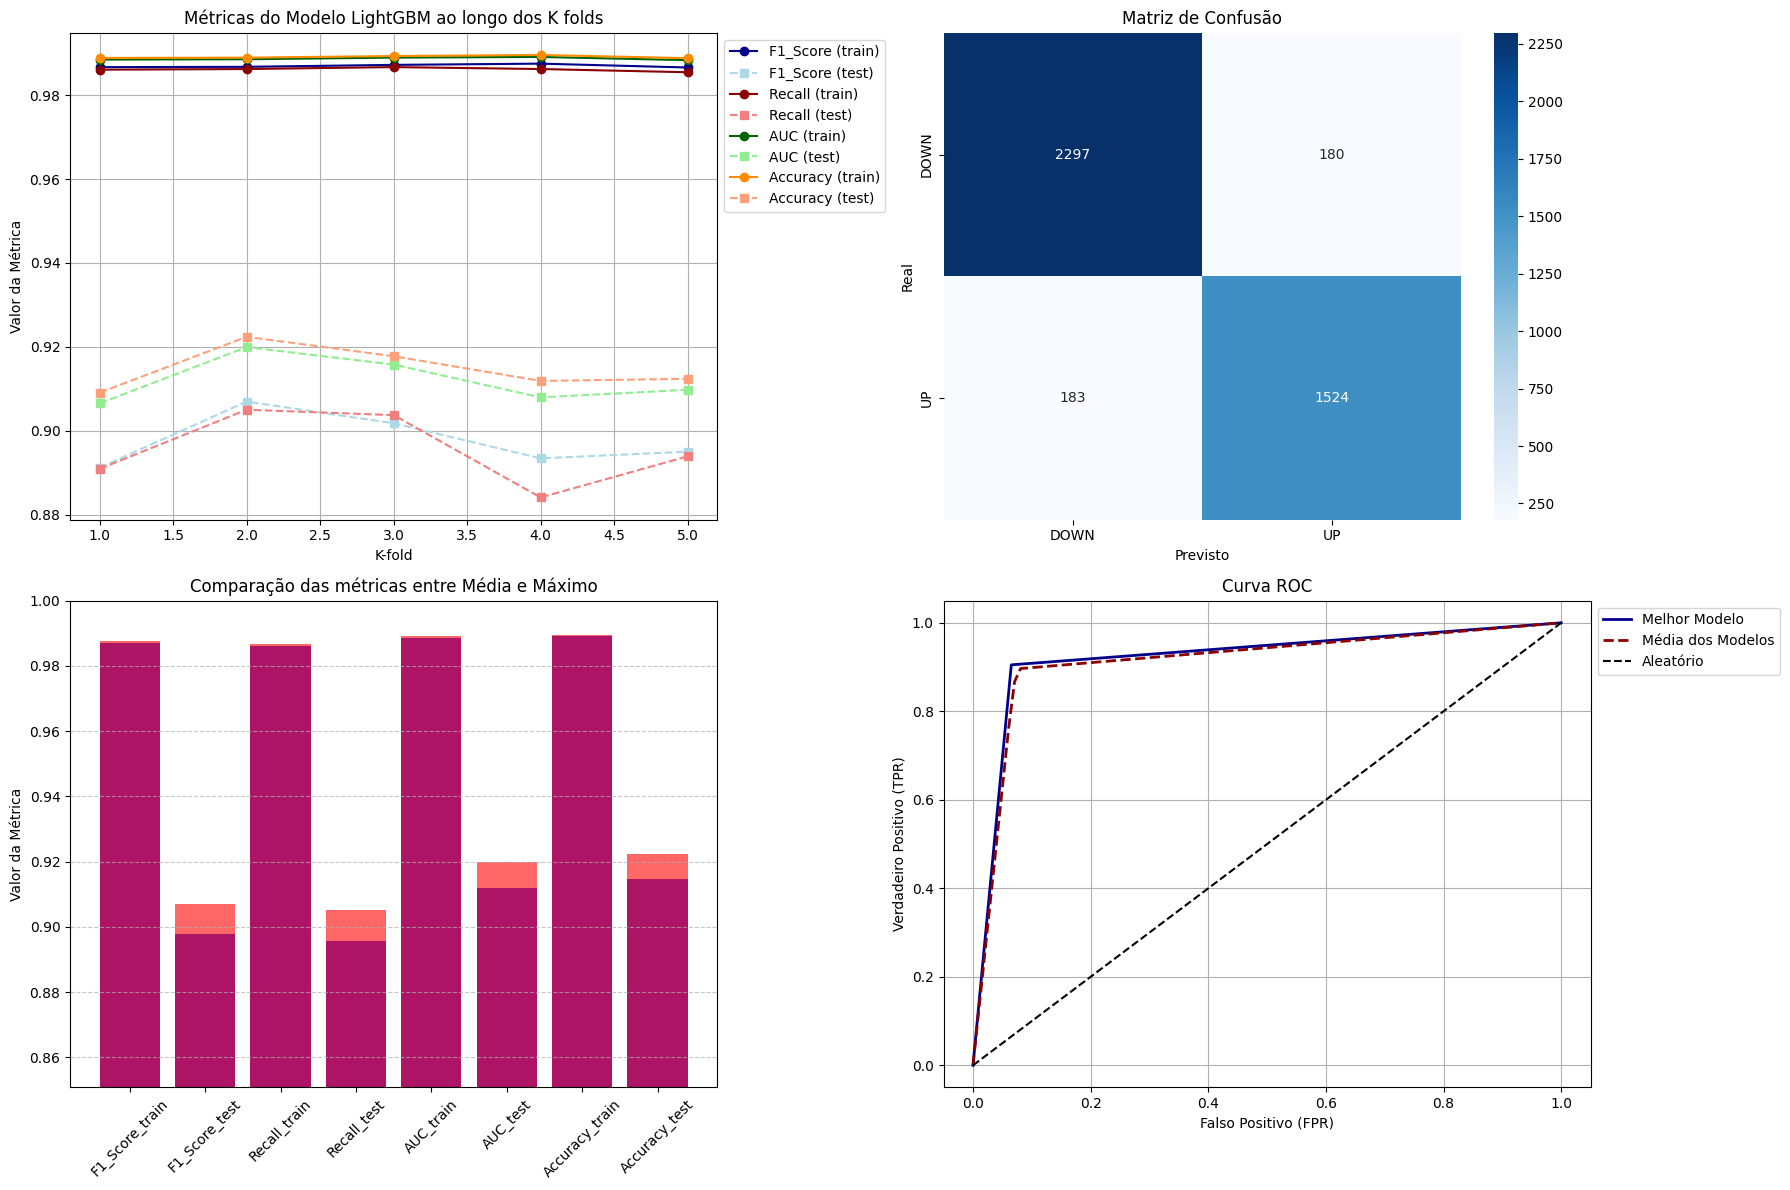

In [15]:
plots.model_evaluate(model_lgbm, df_lgbm, X_test, Y_test, model_name="LightGBM")

In [ ]:
df_iter